In [15]:
# Optionaler Import von MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt

# Import der Maze Klasse
from maze import Maze

# Sonstige Imports
import numpy as np
from typing import Tuple
import numpy.typing as npt

In [16]:
def find_path_bfs(maze: Maze, 
                 start: Tuple[int, int], 
                 goal: Tuple[int, int]) -> Tuple[npt.NDArray, Tuple]:
    """
    Breadth First Search implementation for the Maze class.
    
    :param maze: Maze object containing the elements used for the specific search.
    :param start: Starting coordinates of the maze.
    :param goal: Goal coordinates of the maze.
    :return: An array of coordinates representing the solution path.
    """
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    queue: list[tuple[int, list]] = [(start, [start])]
    
    # Während noch Elemente in der Queue sind. 
    while queue:
        # FIFO Prinzip
        (current_node, path_to) = queue.pop(0)
        
        # Sind wir am Ziel?
        if current_node == goal:
            return np.array(path_to).T, ()
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current_node)

        # Überprüfe alle noch nicht besuchten Nachbarn.
        for neighbor in maze.get_neighbors(coord=current_node, visited=visited):
            
            # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
            # Typecast darf NICHT entfernt werden, macht die Lösung kaputt. Nein, ich habe keine Ahnung warum.
            new_path = list(path_to)
            new_path.append(neighbor)
            queue.append((neighbor, new_path))

    raise Exception("Es konnte kein Weg zum Ziel gefunden werden.")

In [17]:
def find_path_dfs(maze: Maze, 
                 start: Tuple[int, int], 
                 goal: Tuple[int, int]) -> Tuple[npt.NDArray, Tuple]:
    """
    Depth First Search implementation for the Maze class.
    
    :param maze: Maze object containing the elements used for the specific search.
    :param start: Starting coordinates of the maze.
    :param goal: Goal coordinates of the maze.
    :return: An array of coordinates representing the solution path.
    """
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    stack: list[tuple[int, list]] = [(start, [start])]
    
    # Während noch Elemente in der Queue sind. 
    while stack:
        # LIFO Prinzip
        (current_node, path_to) = stack.pop()
        
        # Sind wir am Ziel?
        if current_node == goal:
            return np.array(path_to).T, ()
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current_node)

        # Überprüfe alle noch nicht besuchten Nachbarn.
        for neighbor in maze.get_neighbors(coord=current_node, visited=visited):
            
            # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
            # Typecast darf NICHT entfernt werden, macht die Lösung kaputt. Nein, ich habe keine Ahnung warum.
            new_path = list(path_to)
            new_path.append(neighbor)
            stack.append((neighbor, new_path))

    raise Exception("Es konnte kein Weg zum Ziel gefunden werden.")

depth first search length 229


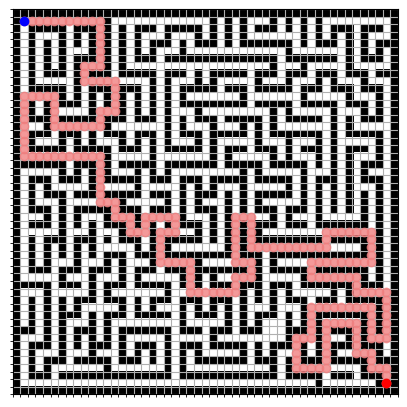

breadth first search length 121


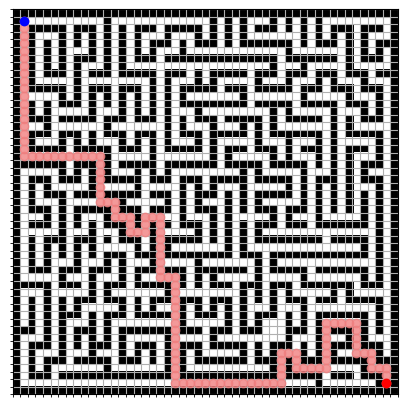

In [18]:
MAZE_FILE = r"examples\labyrinth_50x50.maze"

m = Maze.load_from_file(MAZE_FILE)
path_dfs, stats_dfs = find_path_dfs(m, m.start, m.end)
path_bfs, stats_bfs = find_path_bfs(m, m.start, m.end)

# Plot the depth search
print("depth first search length", len(path_dfs[0]))

fig_dfs = m.plot()
fig_dfs.gca().scatter(path_dfs[1], path_dfs[0], c='lightcoral', zorder=2, alpha=0.8)

plt.show()

# Plot the breadth search
print("breadth first search length", len(path_bfs[0]))

fig_bfs = m.plot()
fig_bfs.gca().scatter(path_bfs[1], path_bfs[0], c='lightcoral', zorder=2, alpha=0.8)

plt.show()